In [1]:
import pandas as pd
import contractions
import re
import stopwords
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textatistic import Textatistic

In [2]:
# data = pd.read_excel("fake_job_postings.xlsx", engine = "openpyxl")
# data.head()

There is noise present in the textual columns, which do not provide useful information and will hinder data pre-precessing. We will carry out the following data cleaning steps:

- Expand Contractions
- Remove URL
- Remove Non-ASCI Characters
- Remove Special Characters
- Remove Extra Spaces
- Convert to Lower Case
- Remove Duplicate Punctuations

In [3]:
# textual_columns = ["company_profile", "description", "requirements", "benefits"]

# data[textual_columns] = data[textual_columns].astype(str)
# cleaned_dataset = data.copy()

In [4]:
# def dataset_cleaning(column_name):
  
#     # generate noise-free cleaned_dataset
#     print('removing noise')

#     # remove non-ASCI characters - should be done first
#     cleaned_dataset[column_name] = cleaned_dataset[column_name].apply(lambda x: re.sub(r'[^\x00-\x7f]', ' ', x))

#     # expand contractions
#     cleaned_dataset[column_name] = cleaned_dataset[column_name].apply(lambda x: contractions.fix(x))

#     # remove URL
#     cleaned_dataset[column_name] = cleaned_dataset[column_name].apply(lambda x: re.sub(r'https?://\S+|www\.\S+', ' ', x))

#     # remove special characters
#     regex_special = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#         u'\U00002702-\U000027B0'
#         u'\U000024C2-\U0001F251'
#         u"\ufe0f"  # dingbats
#         "]+", flags = re.UNICODE)
#     cleaned_dataset[column_name] = cleaned_dataset[column_name].apply(lambda x: regex_special.sub(' ', x))

#     # remove extra spaces
#     cleaned_dataset[column_name] = cleaned_dataset[column_name].apply(lambda x: re.sub('\r\n', ' ', x))
#     cleaned_dataset[column_name] = cleaned_dataset[column_name].apply(lambda x: re.sub('\n', ' ', x))
#     cleaned_dataset[column_name] = cleaned_dataset[column_name].apply(lambda x: re.sub(' +', ' ', x))

#     # convert to lower case
#     cleaned_dataset[column_name] = cleaned_dataset[column_name].apply(lambda x: x.lower())

#     # remove duplicated punctuations
#     regex_punctuation = re.compile(r'''([!#$%&'()*+,./:;<=>?@[\]^_`{|}~-])[!"#$%&'()*+,./:;<=>?@[\]^_`{|}~-]+''')
#     cleaned_dataset[column_name] = cleaned_dataset[column_name].apply(lambda x: regex_punctuation.sub(r'\1', x))

In [5]:
# for col in textual_columns:
#     dataset_cleaning(col)

In [6]:
# cleaned_dataset

In [7]:
cleaned_dataset = pd.read_excel("../Data/gerald_data_processed.xlsx", engine = "openpyxl")

In [8]:
df = cleaned_dataset
tj = df[["salary_range","benefits","industry","function", "fraudulent"]]
print(tj.head())
print(tj.info())

  salary_range                                           benefits  \
0          NaN                                                NaN   
1          NaN  what you will get from usthrough being part of...   
2          NaN                                                NaN   
3          NaN  our culture is anything but corporate we have ...   
4          NaN                              full benefits offered   

                    industry              function  fraudulent  
0                        NaN             Marketing           0  
1  Marketing and Advertising      Customer Service           0  
2                        NaN                   NaN           0  
3          Computer Software                 Sales           0  
4     Hospital & Health Care  Health Care Provider           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0 

In [9]:
print(tj["industry"].describe())
# tj["industry"].str.lower().describe()

print(tj["function"].describe())
# tj["function"].str.lower().describe()

# All unique values in industry and function are really unique. 


tj["function"].fillna("None", inplace = True)
tj["industry"].fillna("None", inplace = True)

count                                   12977
unique                                    131
top       Information Technology and Services
freq                                     1734
Name: industry, dtype: object
count                      11425
unique                        37
top       Information Technology
freq                        1749
Name: function, dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_13520\3159813149.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tj["function"].fillna("None", inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_13520\3159813149.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tj["industry"].fillna("None", inplace = True)


industry
None                                   4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: count, Length: 132, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_13520\1377571075.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tj["industry_no_na"] = tj["industry"]
C:\Users\user\AppData\Local\Temp\ipykernel_13520\1377571075.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tj["industry_no_na"] = tj["industry_no_na"].apply(lambda x: 'Others' if x in low_count_categories else x)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprec

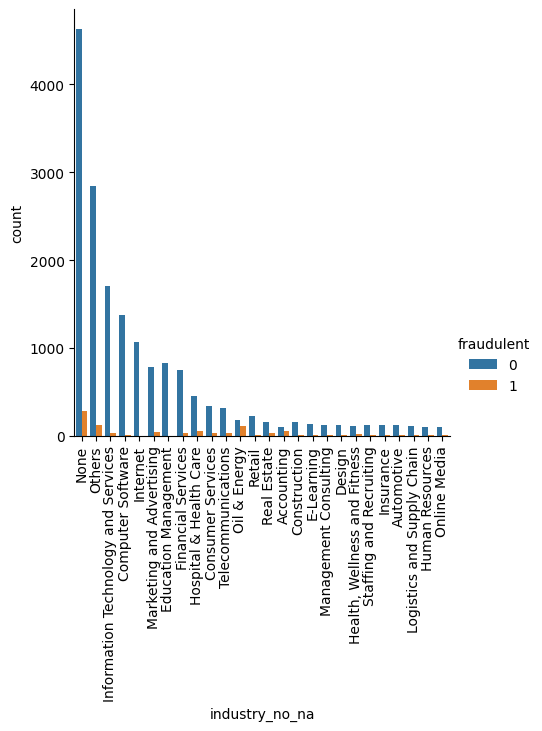

In [10]:
# EDA and Feature engineering for industry
# Let's settle industry first: 
# Industry is categorical. It would make sense to visualise this in a barplot (proportion of fraud in each industry). And also visualize the number of fraud cases across all industries. Since there is a large proportion of NA values, it would make sense to visualise the comparison of fraud cases when industry is NA, vs when it isnt. 

industry_value_counts = tj["industry"].value_counts()
print(industry_value_counts)

low_count_categories = industry_value_counts[industry_value_counts < 100].index.tolist()
#print(industry_value_counts)
#print(low_count_categories)
tj["industry_no_na"] = tj["industry"]
tj["industry_no_na"] = tj["industry_no_na"].apply(lambda x: 'Others' if x in low_count_categories else x)
#tj["industry_no_na"].value_counts()
industry_counts = tj["industry_no_na"].value_counts().sort_values(ascending=False)
sns.catplot(data = tj, x = "industry_no_na", kind = "count", order = industry_counts.index, hue = "fraudulent")
plt.xticks(rotation = 90)
plt.show()


In [11]:
ratio_for_industry = tj.groupby('industry')["fraudulent"].agg("mean").sort_values(ascending = False)
print(ratio_for_industry)

# Ranching to Animation are here because their value counts are <100. 

industry
Ranching                               1.000000
Military                               0.500000
Animation                              0.400000
Oil & Energy                           0.379791
Accounting                             0.358491
                                         ...   
Internet                               0.000000
International Trade and Development    0.000000
Industrial Automation                  0.000000
Individual & Family Services           0.000000
Writing and Editing                    0.000000
Name: fraudulent, Length: 132, dtype: float64


In [12]:
ratio_for_industry_no_na = tj.groupby('industry_no_na')["fraudulent"].agg("mean").sort_values(ascending = False)
print(ratio_for_industry_no_na)

industry_no_na
Oil & Energy                           0.379791
Accounting                             0.358491
Real Estate                            0.137143
Health, Wellness and Fitness           0.118110
Hospital & Health Care                 0.102616
Telecommunications                     0.076023
Consumer Services                      0.067039
Staffing and Recruiting                0.062992
None                                   0.056088
Human Resources                        0.055556
Marketing and Advertising              0.054348
Insurance                              0.048780
Management Consulting                  0.046154
Financial Services                     0.044929
Automotive                             0.041667
Others                                 0.040527
Design                                 0.031008
Retail                                 0.022422
Construction                           0.018987
Information Technology and Services    0.018454
Logistics and Supply Chai

industry_no_na
None                                   275
Others                                 120
Oil & Energy                           109
Accounting                              57
Hospital & Health Care                  51
Marketing and Advertising               45
Financial Services                      35
Information Technology and Services     32
Telecommunications                      26
Real Estate                             24
Consumer Services                       24
Health, Wellness and Fitness            15
Staffing and Recruiting                  8
Human Resources                          6
Management Consulting                    6
Insurance                                6
Automotive                               5
Computer Software                        5
Retail                                   5
Design                                   4
Construction                             3
Logistics and Supply Chain               2
E-Learning                             

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

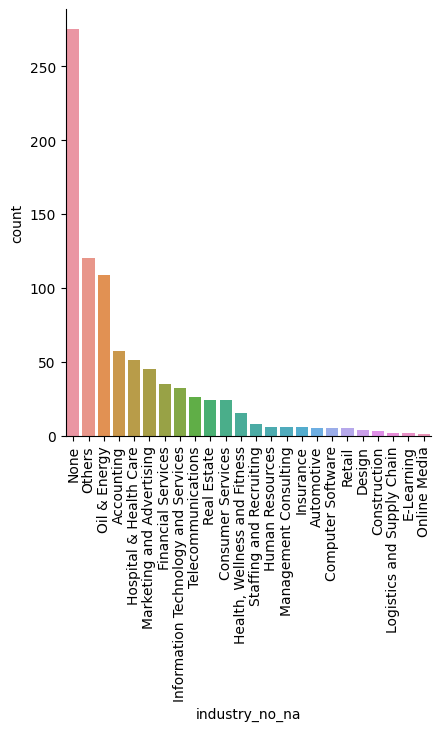

In [13]:
# Plotting distribution of counts of fraud cases for every industry

fraudulent = tj[tj["fraudulent"] == 1]
#fraudulent.head()
#fraudulent.info()
industry_fraudulent_counts = fraudulent["industry_no_na"].value_counts().sort_values(ascending=False)
print(industry_fraudulent_counts)

sns.catplot(data = fraudulent, x = "industry_no_na", kind = "count", order = industry_fraudulent_counts.index)
plt.xticks(rotation = 90)
plt.show()


function
None                      6455
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46

C:\Users\user\AppData\Local\Temp\ipykernel_13520\3124558117.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tj["function_no_na"] = tj["function"]
C:\Users\user\AppData\Local\Temp\ipykernel_13520\3124558117.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tj["function_no_na"] = tj["function_no_na"].apply(lambda x: 'Others' if x in low_count_categories_function else x)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype i

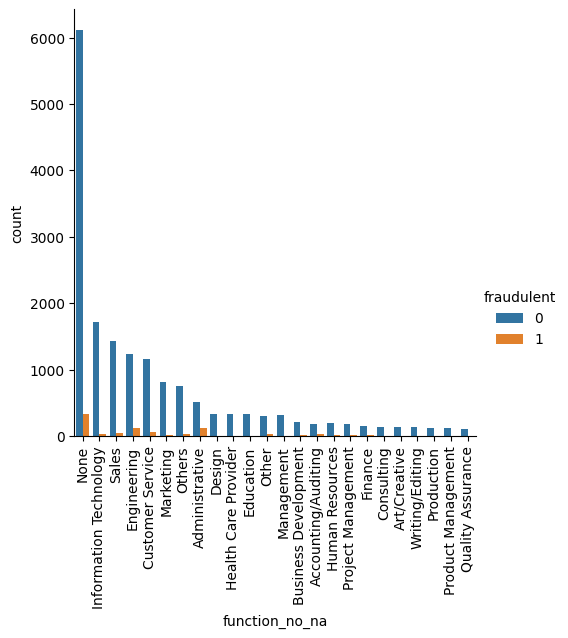

In [14]:
# EDA and Feature engineering for function

function_value_counts = tj["function"].value_counts()
print(function_value_counts)

low_count_categories_function = function_value_counts[function_value_counts < 100].index.tolist()
#print(industry_value_counts)
#print(low_count_categories)
tj["function_no_na"] = tj["function"]
tj["function_no_na"] = tj["function_no_na"].apply(lambda x: 'Others' if x in low_count_categories_function else x)
#tj["industry_no_na"].value_counts()
function_counts = tj["function_no_na"].value_counts().sort_values(ascending=False)
sns.catplot(data = tj, x = "function_no_na", kind = "count", order = function_counts.index, hue = "fraudulent")
plt.xticks(rotation = 90)
plt.show()

In [15]:
ratio_for_function = tj.groupby('function_no_na')["fraudulent"].agg("mean").sort_values(ascending = False)
print(ratio_for_function)

function_no_na
Administrative            0.188889
Accounting/Auditing       0.136792
Other                     0.098462
Finance                   0.087209
Engineering               0.083828
Business Development      0.057018
Project Management        0.054645
Customer Service          0.054516
None                      0.052208
Human Resources           0.043902
Others                    0.029601
Sales                     0.027929
Consulting                0.027778
Management                0.018927
Information Technology    0.018296
Marketing                 0.012048
Design                    0.008824
Art/Creative              0.007576
Education                 0.003077
Health Care Provider      0.002959
Product Management        0.000000
Production                0.000000
Quality Assurance         0.000000
Writing/Editing           0.000000
Name: fraudulent, dtype: float64


function_no_na
None                      337
Administrative            119
Engineering               113
Customer Service           67
Sales                      41
Other                      32
Information Technology     32
Accounting/Auditing        29
Others                     23
Finance                    15
Business Development       13
Marketing                  10
Project Management         10
Human Resources             9
Management                  6
Consulting                  4
Design                      3
Education                   1
Art/Creative                1
Health Care Provider        1
Name: count, dtype: int64


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

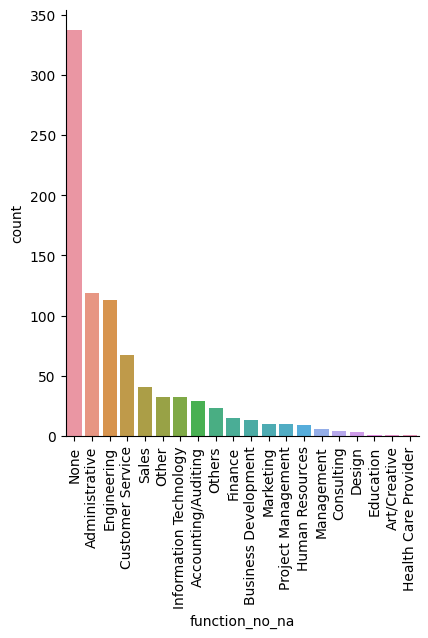

In [16]:
# Plot count of fraudulent cases by function

fraudulent = tj[tj["fraudulent"] == 1]
function_fraudulent_counts = fraudulent["function_no_na"].value_counts().sort_values(ascending=False)
print(function_fraudulent_counts)

sns.catplot(data = fraudulent, x = "function_no_na", kind = "count", order = function_fraudulent_counts.index)
plt.xticks(rotation = 90)
plt.show()

In [17]:
# Extracting the lower and upper bounds of the salary_range column and putting it into 2 columns
salary_range = tj.copy()
#print(salary_range.info())

salary_range['salary_range'] = salary_range['salary_range'].astype(str)
pattern = r'^\d+-\d+$'
#print(salary_range.info())
mask = salary_range['salary_range'].str.match(pattern)
salary_range.loc[~mask, 'salary_range'] = None
#print(salary_range.info())
salary_range[['lower', 'upper']] = salary_range['salary_range'].str.split('-', expand=True)
#print(salary_range.info())
salary_range[['lower', 'upper']] = salary_range[['lower', 'upper']].apply(pd.to_numeric, errors='coerce')
salary_range["avg_salary"] = salary_range[["lower", "upper"]].mean(axis = 1)
#print(salary_range.info())
salary_range["salary_given"] = salary_range["salary_range"].apply(lambda x: False if x == None else True)
salary_range["salary_range_calculated"] = salary_range["upper"] - salary_range["lower"]
print(salary_range.info())
print(salary_range[salary_range["salary_given"]].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary_range             2841 non-null   object 
 1   benefits                 10616 non-null  object 
 2   industry                 17880 non-null  object 
 3   function                 17880 non-null  object 
 4   fraudulent               17880 non-null  int64  
 5   industry_no_na           17880 non-null  object 
 6   function_no_na           17880 non-null  object 
 7   lower                    2841 non-null   float64
 8   upper                    2841 non-null   float64
 9   avg_salary               2841 non-null   float64
 10  salary_given             17880 non-null  bool   
 11  salary_range_calculated  2841 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 1.5+ MB
None
     salary_range                                          

In [18]:
# This chunk is to check the number of fraud for every salary range. Also plots a histogram of salary range. 
#salary_range = tj.dropna(subset = ["salary_range"])
#print(salary_range.head())


# salary_range["salary_range"] = salary_range["salary_range"].str.replace("-", " ").str.split()
# salary_range[["lower", "upper"]] = salary_range["salary_range"].apply(lambda x: pd.Series if ~x.isna() else None)

# non_integer_indices = salary_range[~salary_range['lower'].astype("str").str.isdigit()].index
# non_integer_indices1 = salary_range[~salary_range['upper'].astype("str").str.isdigit()].index

# y = np.array(non_integer_indices)
# x = np.array(non_integer_indices1)

# z = np.concatenate((y,x))

# salary_range = salary_range.loc[~salary_range.index.isin(z)]

# salary_range["lower"] = salary_range["lower"].astype("int")
# salary_range["upper"] = salary_range["upper"].astype("int")
# salary_range.drop(columns = ["salary_range"], inplace = True)

# salary_range["avg_salary"] = salary_range[["lower", "upper"]].mean(axis = 1)

# salary range has too many nan values to be useful (2k+ out of the 17k+ rows)

count    2.841000e+03
mean     6.640744e+05
std      2.237353e+07
min      0.000000e+00
25%      2.200000e+04
50%      4.500000e+04
75%      7.250000e+04
max      1.000000e+09
Name: avg_salary, dtype: float64
22373525.152791914


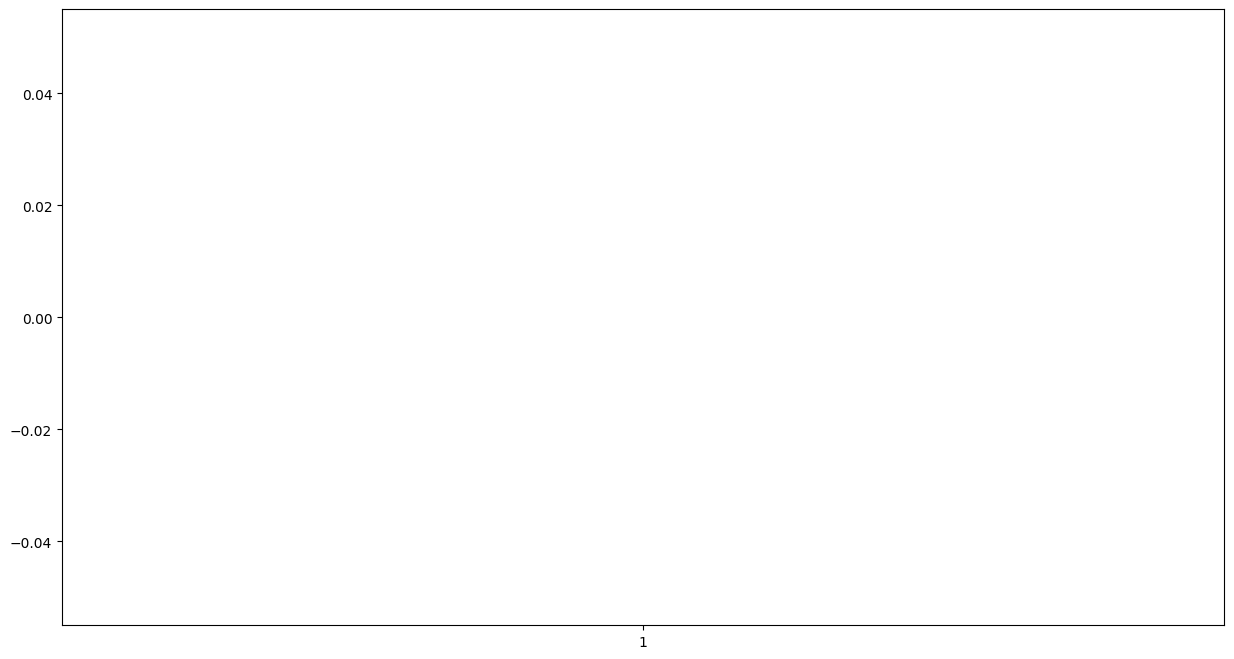

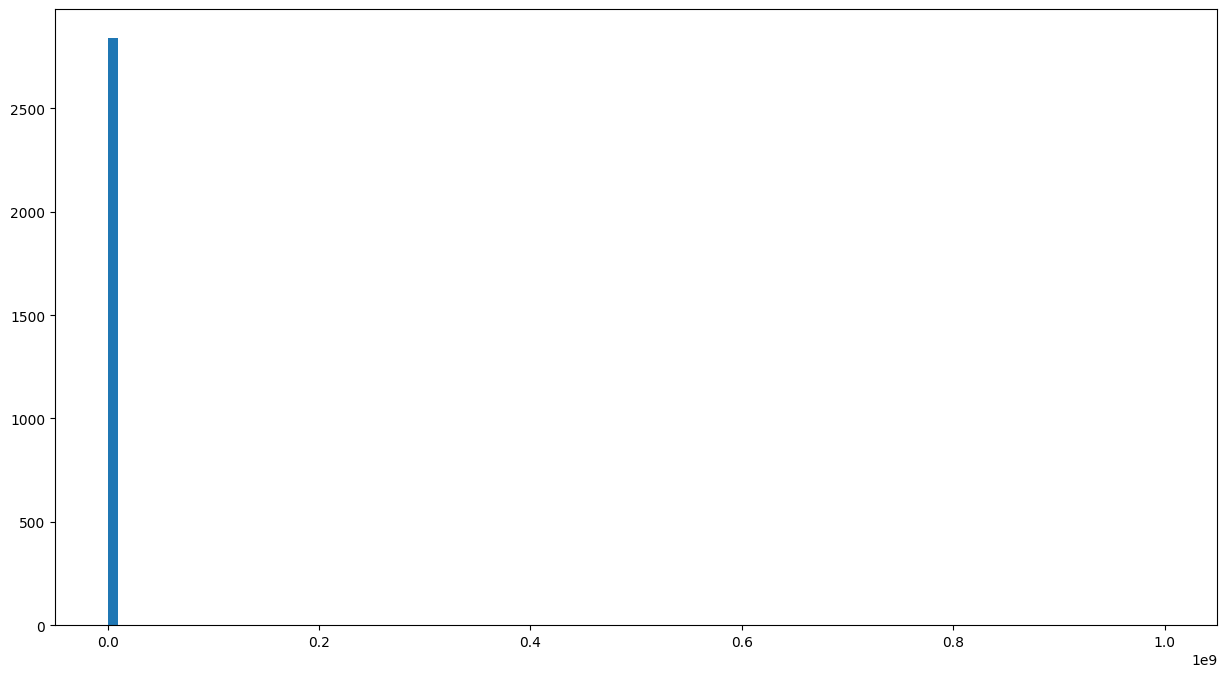

In [19]:
# Descriptive stats on avg_salary and a histogram of it. But clearly its not super helpful lols.

print(salary_range["avg_salary"].describe())

print(salary_range["avg_salary"].std())

fig, ax = plt.subplots(figsize=(15,8))
plt.boxplot(salary_range["avg_salary"])
plt.show()

fig, ax = plt.subplots(figsize=(15,8))
plt.hist(salary_range["avg_salary"], bins = 100)
plt.show()

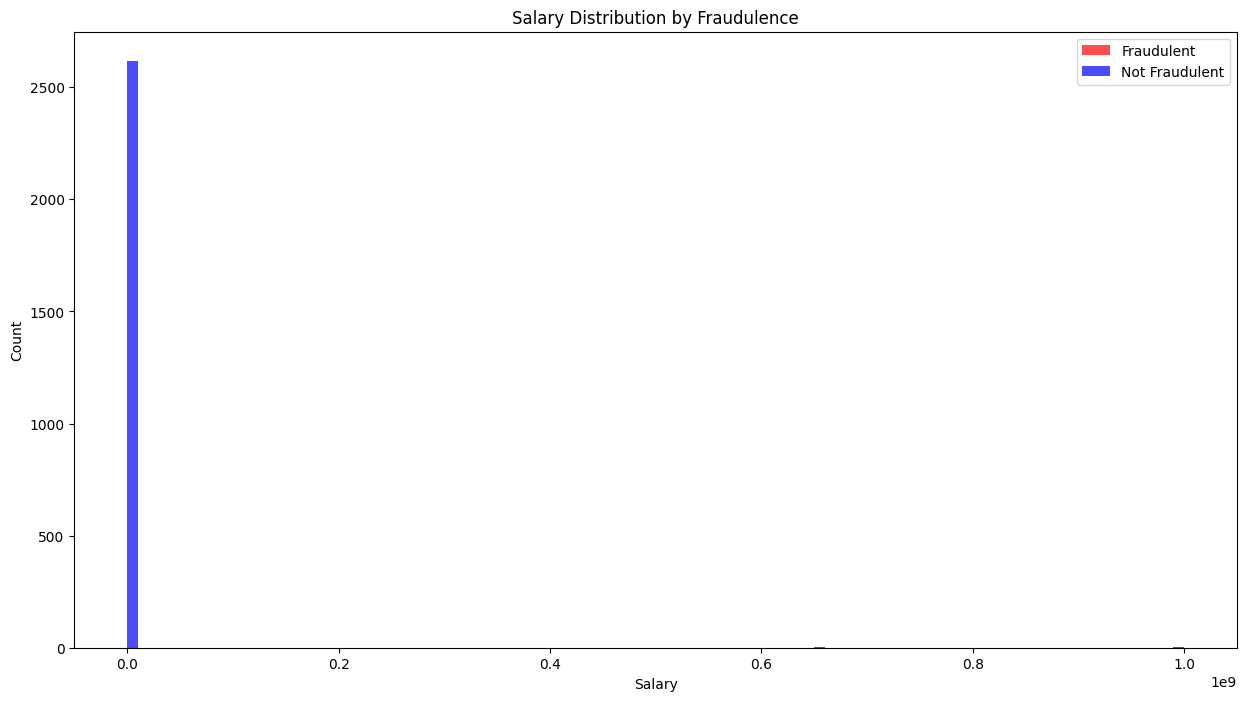

  salary_range                                           benefits  \
0         None                                                NaN   
1         None  what you will get from usthrough being part of...   
2         None                                                NaN   
3         None  our culture is anything but corporate we have ...   
4         None                              full benefits offered   

                    industry              function  fraudulent  \
0                       None             Marketing           0   
1  Marketing and Advertising      Customer Service           0   
2                       None                  None           0   
3          Computer Software                 Sales           0   
4     Hospital & Health Care  Health Care Provider           0   

              industry_no_na        function_no_na  lower  upper  avg_salary  \
0                       None             Marketing    NaN    NaN         NaN   
1  Marketing and Advertising

In [20]:
# This is not v helpful either. Althoughhhh you can spot the outliers --> non fraud cases at 650mil ish and 1 bil

fig, ax = plt.subplots(figsize=(15,8))
plt.hist(salary_range[salary_range['fraudulent'] == 1]['avg_salary'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range[salary_range['fraudulent'] == 0]['avg_salary'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary Distribution by Fraudulence')
plt.legend()

# Show the plot
plt.show()

print(salary_range.head())
# print(salary_range.columns)

In [21]:
salary_range.loc[(salary_range["avg_salary"] > 700000) & (salary_range["fraudulent"] == 1),:]

,salary_range,benefits,industry,function,fraudulent,industry_no_na,function_no_na,lower,upper,avg_salary,salary_given,salary_range_calculated
5073,6266624-8582080,san jose water company offers a very comprehen...,Utilities,Engineering,1,Others,Engineering,6266624.0,8582080.0,7424352.0,True,2315456.0


Salary Range Descriptive Statistics: 
count    2.830000e+03
mean     6.572954e+04
std      1.093162e+05
min      0.000000e+00
25%      2.200000e+04
50%      4.500000e+04
75%      7.250000e+04
max      1.550000e+06
Name: avg_salary, dtype: float64
Salary Range's Standard Deviation: 109316.1954310262


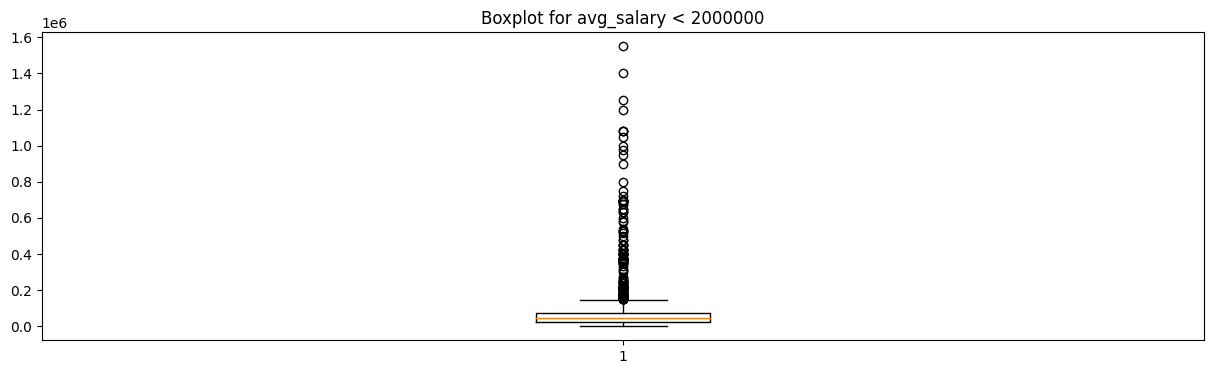

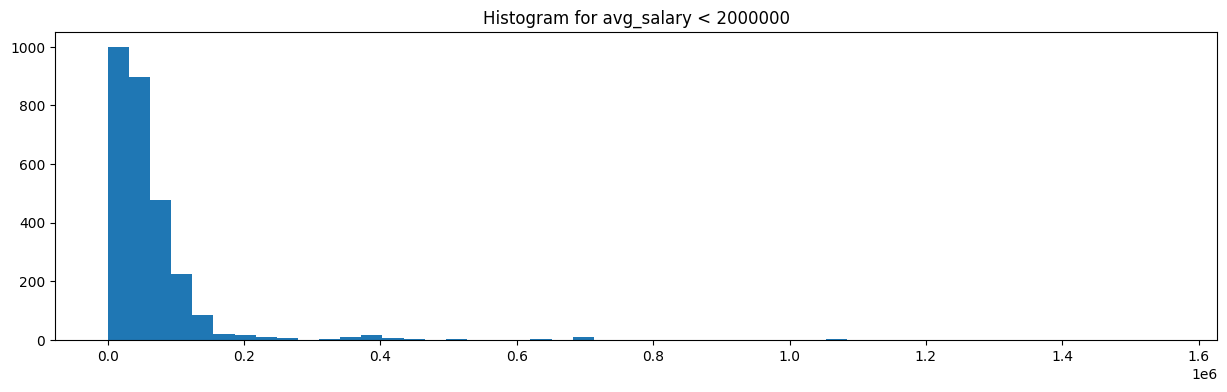

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

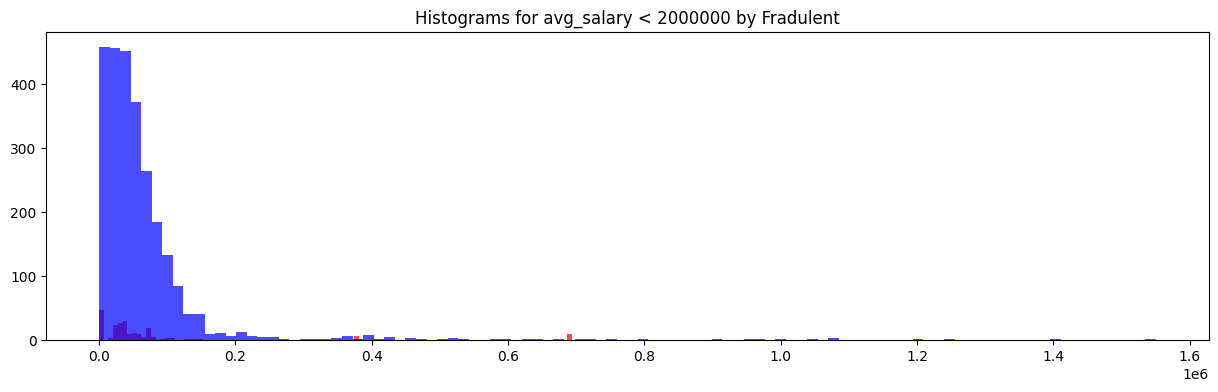

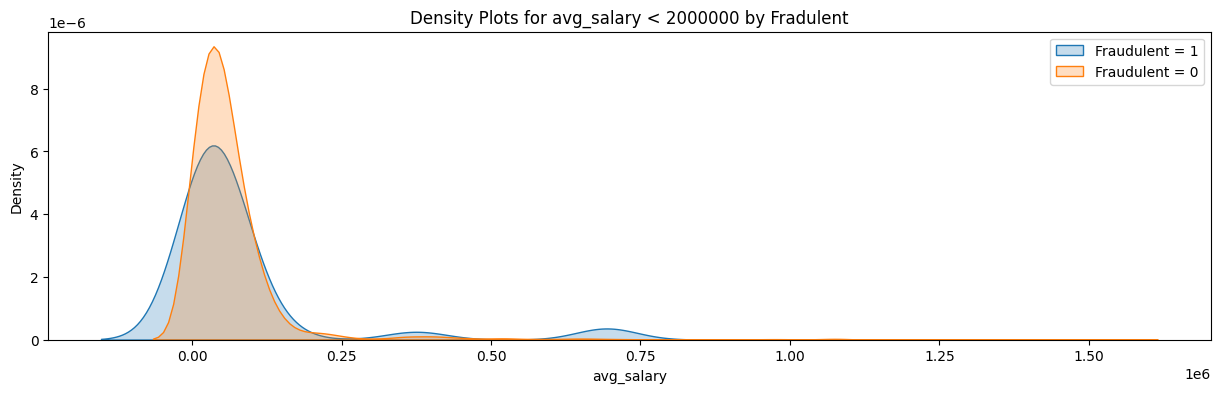

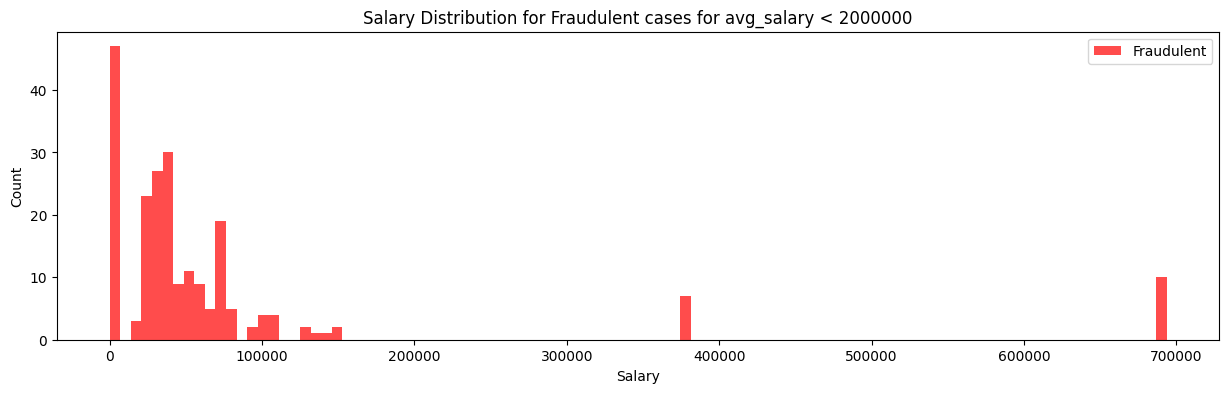

  salary_range                                           benefits  \
0         None                                                NaN   
1         None  what you will get from usthrough being part of...   
2         None                                                NaN   
3         None  our culture is anything but corporate we have ...   
4         None                              full benefits offered   

                    industry              function  fraudulent  \
0                       None             Marketing           0   
1  Marketing and Advertising      Customer Service           0   
2                       None                  None           0   
3          Computer Software                 Sales           0   
4     Hospital & Health Care  Health Care Provider           0   

              industry_no_na        function_no_na  lower  upper  avg_salary  \
0                       None             Marketing    NaN    NaN         NaN   
1  Marketing and Advertising

In [22]:
# Filter the values where avg_salary are < 2,000,000 

salary_range_helper = salary_range.copy()
salary_range_helper["avg_salary"].fillna(-1, inplace = True)
salary_range_helper = salary_range_helper[salary_range_helper["avg_salary"] < 2000000] # we lose only 11 values
salary_range_helper["avg_salary"].replace(-1, float('nan'), inplace = True)

print("Salary Range Descriptive Statistics: ")
print(salary_range_helper["avg_salary"].describe())
print("Salary Range's Standard Deviation: " + str(salary_range_helper["avg_salary"].std()))

fig, ax = plt.subplots(figsize=(15,4))
avg_salary = salary_range_helper["avg_salary"].dropna()
plt.boxplot(avg_salary)
plt.title("Boxplot for avg_salary < 2000000")
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper["avg_salary"], bins = 50)
plt.title("Histogram for avg_salary < 2000000")
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 1]['avg_salary'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 0]['avg_salary'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')
plt.title("Histograms for avg_salary < 2000000 by Fradulent")

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(salary_range_helper['avg_salary'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', fill=True)
sns.kdeplot(salary_range_helper['avg_salary'][salary_range_helper['fraudulent'] == 0], label='Fraudulent = 0', fill=True)
plt.title("Density Plots for avg_salary < 2000000 by Fradulent")
plt.legend()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 1]['avg_salary'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.title("Salary Distribution for Fraudulent cases for avg_salary < 2000000")
# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

print(salary_range_helper.head())
# print(salary_range.columns)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

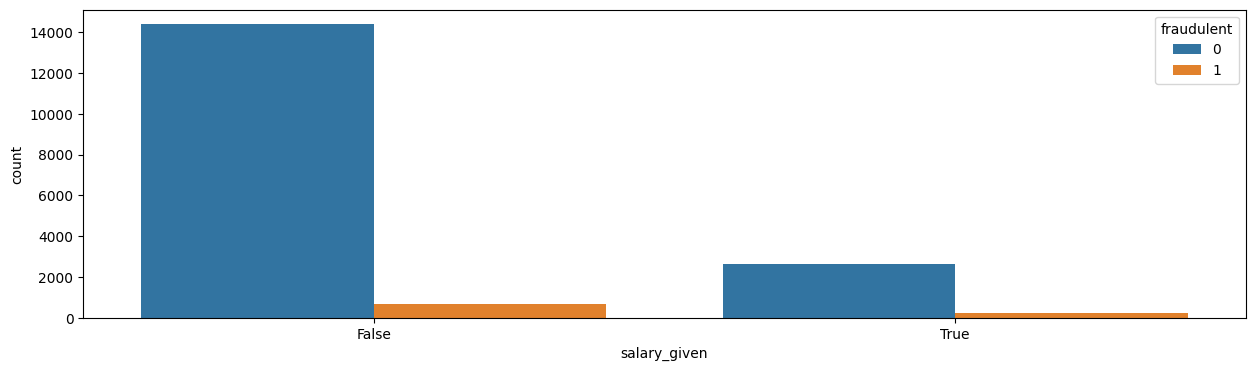

salary_given
False    15039
True      2830
Name: count, dtype: int64


In [23]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(data = salary_range_helper, x = "salary_given", hue = "fraudulent")
plt.show()

print(salary_range_helper["salary_given"].value_counts())

In [24]:
ratio_for_fraud_for_salary_given = salary_range_helper.groupby('salary_given')["fraudulent"].agg("mean").sort_values(ascending = False)
print(ratio_for_fraud_for_salary_given)

salary_given
True     0.078092
False    0.042822
Name: fraudulent, dtype: float64


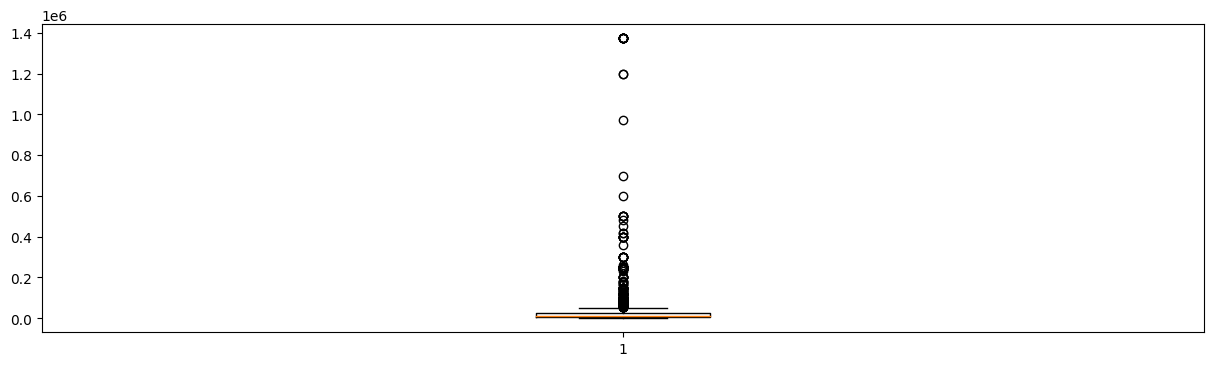

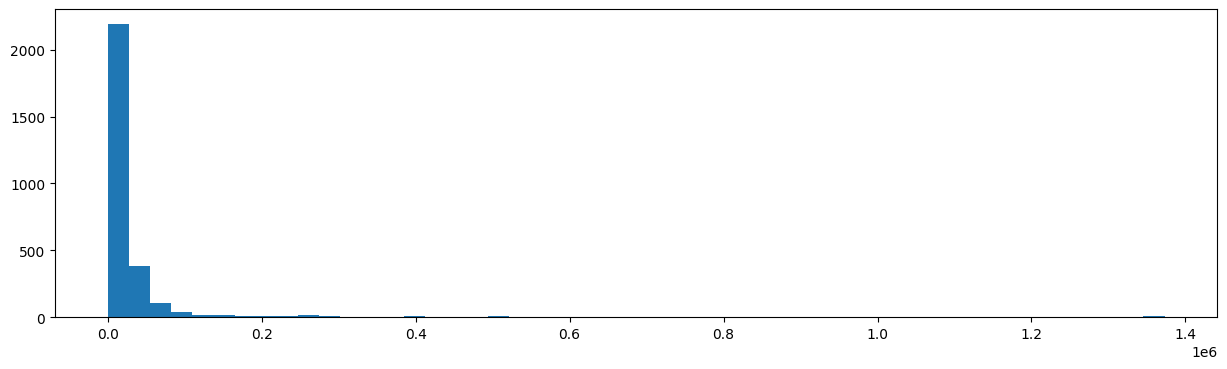

C:\Users\user\AppData\Local\Temp\ipykernel_13520\220011488.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salary_range_helper['salary_range_calculated'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_13520\220011488.py:

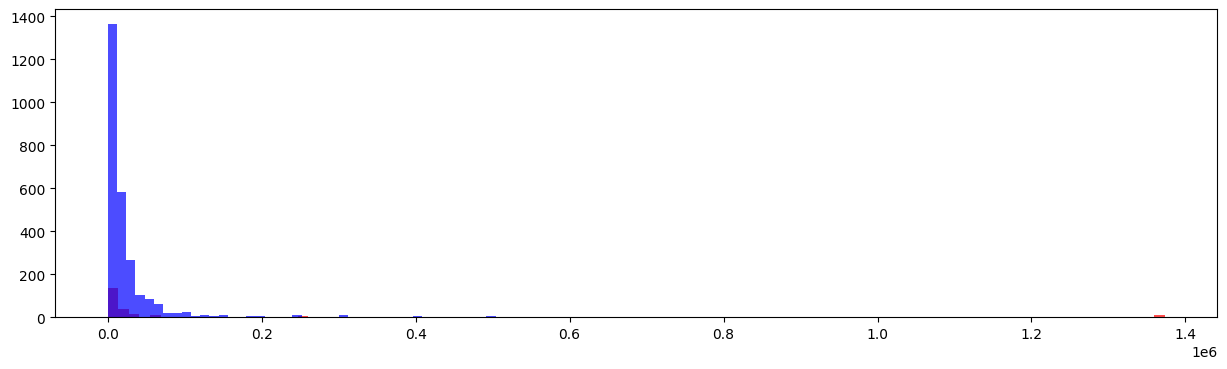

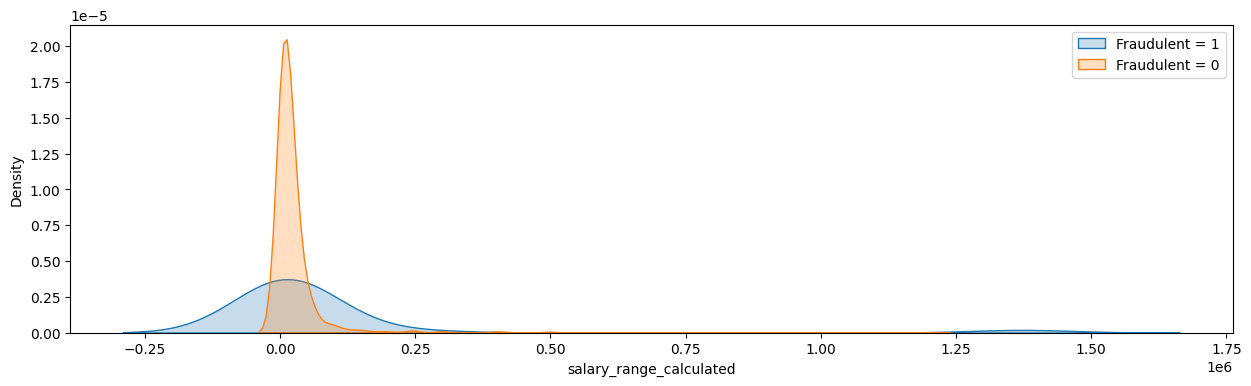

In [25]:
# Salary ranges
fig, ax = plt.subplots(figsize=(15,4))
salary_range_calculated = salary_range_helper["salary_range_calculated"].dropna()
plt.boxplot(salary_range_calculated)
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper["salary_range_calculated"], bins = 50)
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 1]['salary_range_calculated'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 0]['salary_range_calculated'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(salary_range_helper['salary_range_calculated'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(salary_range_helper['salary_range_calculated'][salary_range_helper['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

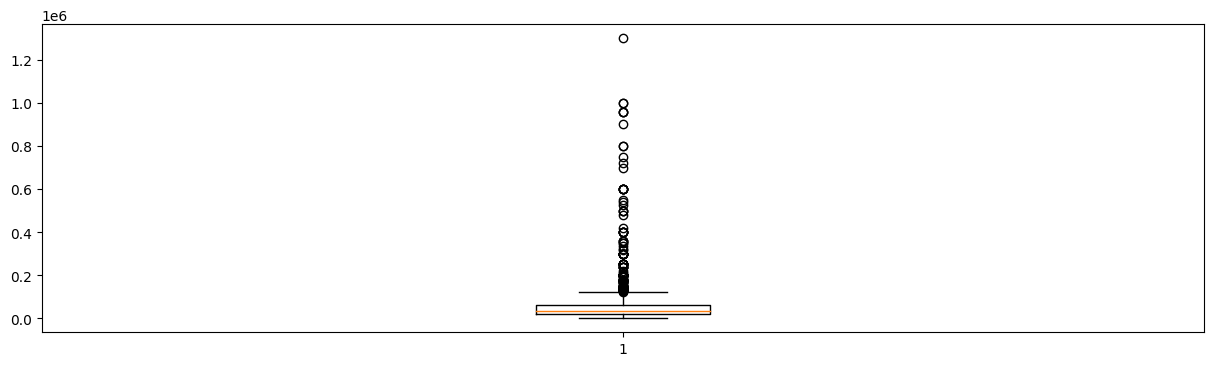

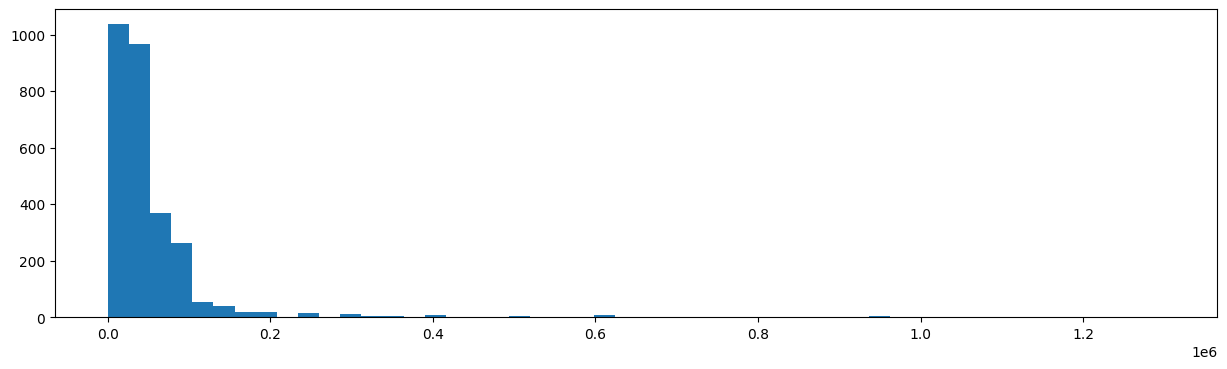

C:\Users\user\AppData\Local\Temp\ipykernel_13520\2468923509.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salary_range_helper['lower'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_13520\2468923509.py:18: FutureWarnin

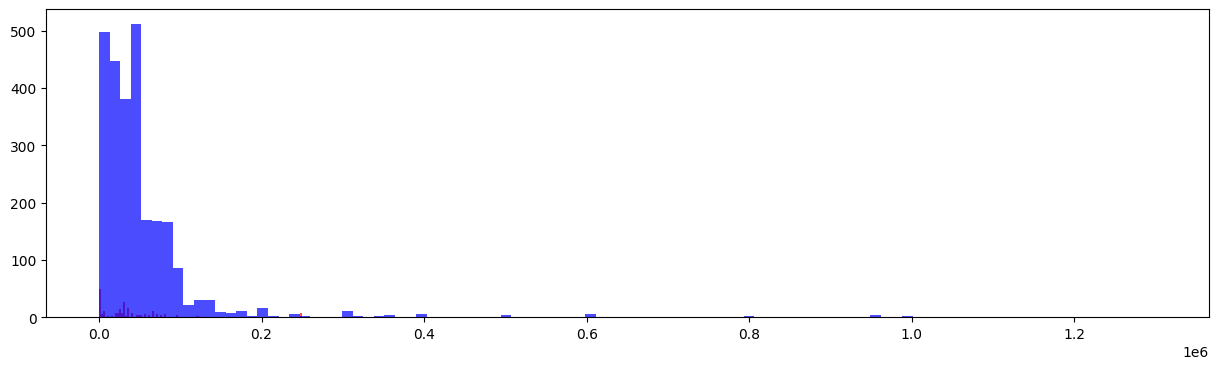

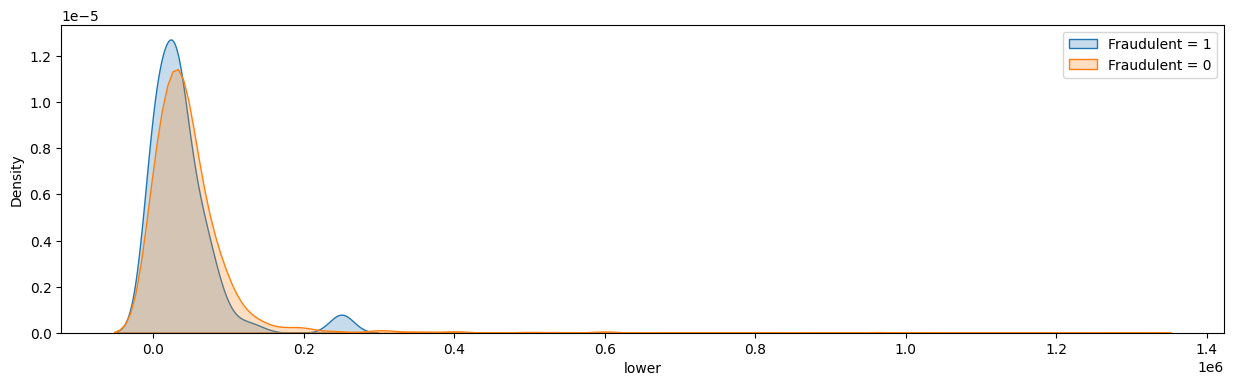

In [26]:
# Salary lower
fig, ax = plt.subplots(figsize=(15,4))
lower = salary_range_helper["lower"].dropna()
plt.boxplot(lower)
# plt.boxplot(salary_range_helper["lower"])
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper["lower"], bins = 50)
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 1]['lower'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 0]['lower'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(salary_range_helper['lower'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(salary_range_helper['lower'][salary_range_helper['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

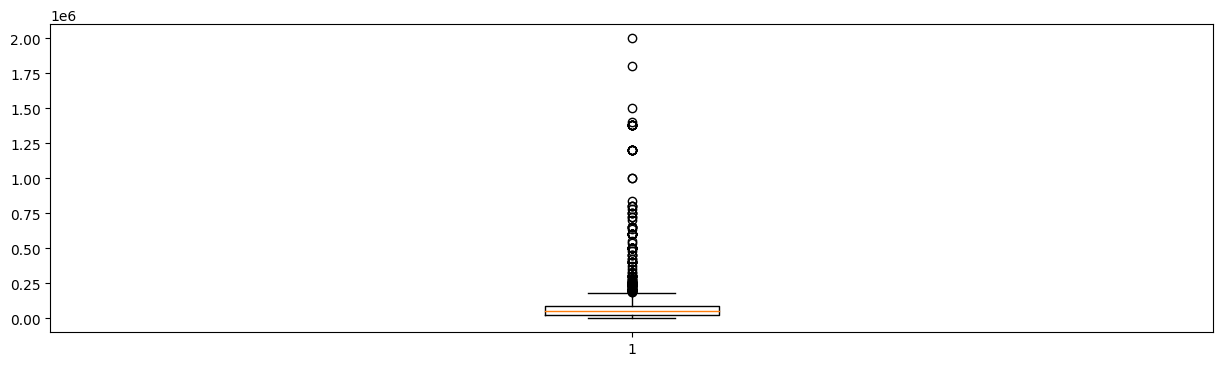

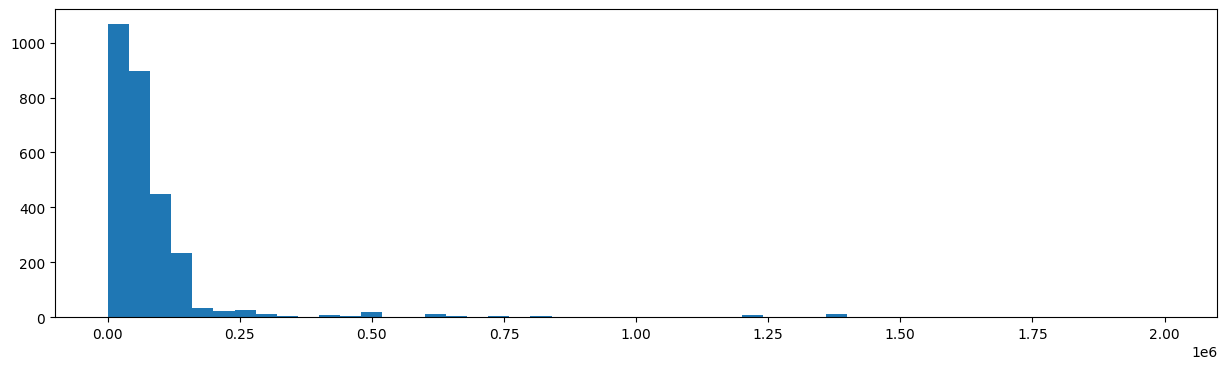

C:\Users\user\AppData\Local\Temp\ipykernel_13520\3870663514.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salary_range_helper['upper'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_13520\3870663514.py:18: FutureWarnin

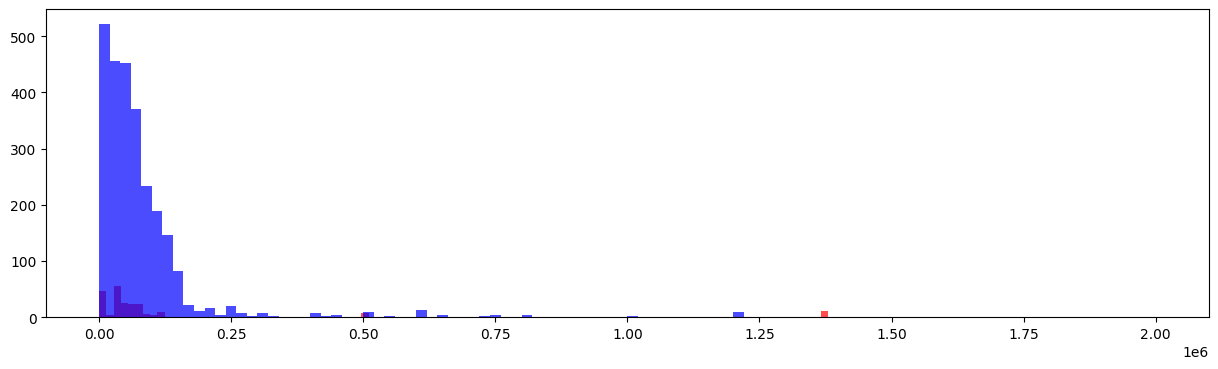

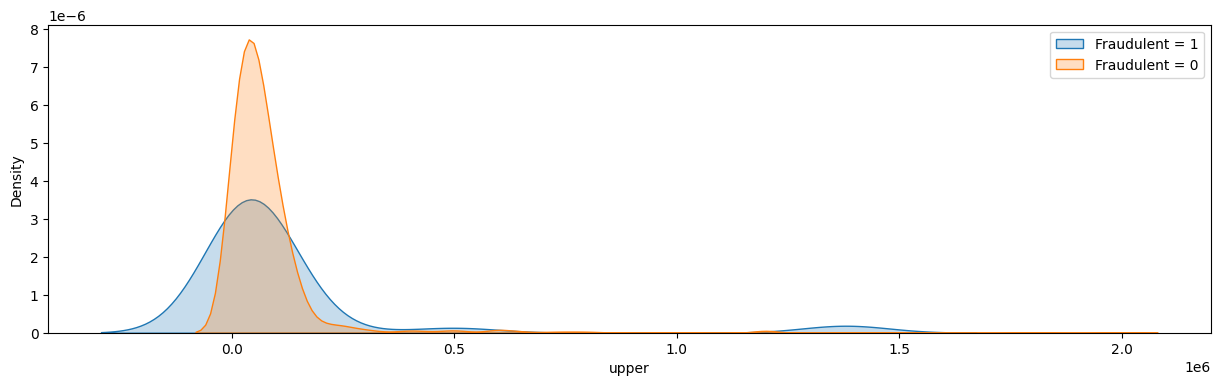

In [27]:
# Salary Upper
fig, ax = plt.subplots(figsize=(15,4))
upper = salary_range_helper["upper"].dropna()
plt.boxplot(upper)
# plt.boxplot(salary_range_helper["upper"])
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper["upper"], bins = 50)
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 1]['upper'], bins=100, color='red', alpha=0.7, label='Fraudulent')
plt.hist(salary_range_helper[salary_range_helper['fraudulent'] == 0]['upper'], bins=100, color='blue', alpha=0.7, label='Not Fraudulent')

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(salary_range_helper['upper'][salary_range_helper['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(salary_range_helper['upper'][salary_range_helper['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

In [28]:
# convert all the "nan" in the benefits column to None. 
benefits = tj.copy()


print(benefits["benefits"].value_counts().sort_values(ascending = False))
# job description is 726
# career prospects is 190

#benefits[benefits["benefits"] == "nan"]
#print(benefits["benefits"].value_counts())

benefits["benefits_with_na"] = benefits["benefits"].fillna("")

def transform_text(text):
    return re.sub(r'(phone|email|url)_', r'\1 ', text)

# Apply the transformation to the 'text_column'
benefits['benefits_with_na'] = benefits['benefits_with_na'].apply(lambda x: transform_text(x) if pd.notnull(x) else x)

print(benefits.info())
# benefits[benefits["benefits_with_na"] == ""]

benefits
see job description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

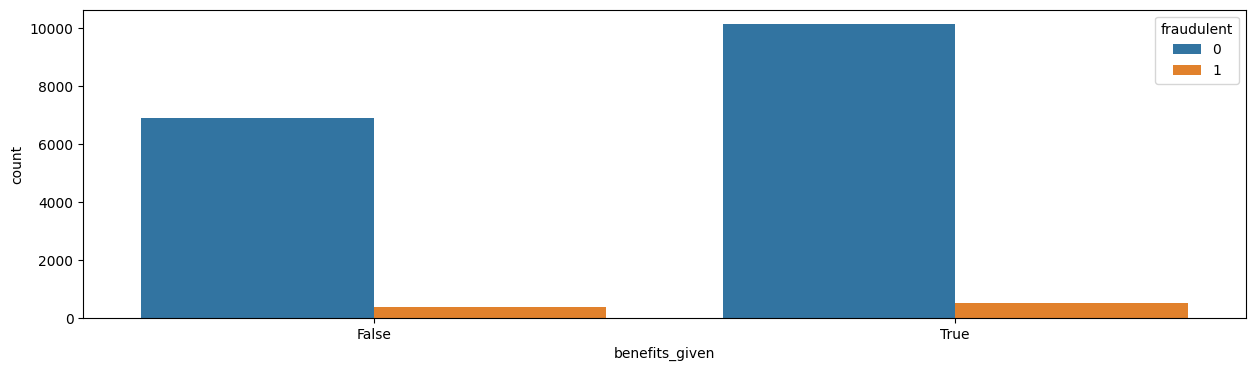

benefits_given
False    0.050248
True     0.047193
Name: fraudulent, dtype: float64


In [29]:
# Find number of characters, words, and average word length

# number of characters
benefits['num_char_benefits'] = benefits['benefits_with_na'].apply(len)

# number of words
def word_count(string): 
    words = string.split()
    return len(words)

benefits['num_words_benefits'] = benefits['benefits_with_na'].apply(word_count)

# average word length
benefits['avg_word_length_benefits'] = benefits['num_char_benefits']/benefits['num_words_benefits']
benefits['avg_word_length_benefits'].replace([np.inf, -np.inf], 0, inplace=True)
benefits['avg_word_length_benefits'].fillna(0, inplace = True)
#benefits.head()
# print(benefits["num_char_benefits"].value_counts())
# print(benefits["num_words_benefits"].value_counts())
# print(benefits["avg_word_length_benefits"].value_counts())
# The above print statements prove that only the benefits with NaN were converted to have 0s. There were no benefits that were "" by themselves. 

benefits["benefits_given"] = benefits["benefits_with_na"].apply(lambda x: False if x == "" else True)

fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(data = benefits, x = "benefits_given", hue = "fraudulent")
plt.show()

ratio_for_fraud_for_benefits_given = benefits.groupby('benefits_given')["fraudulent"].agg("mean").sort_values(ascending = False)
print(ratio_for_fraud_for_benefits_given)

In [31]:
# Run this chunk of code if you want to see what happened to the rows with phone_ or email_ or url_

# phone_email_rows = benefits[benefits['benefits_with_na'].str.contains(r'\b(phone|email|url)')]
# #print(phone_email_rows["benefits_with_na"].to_string(index=False))
# for index, row in phone_email_rows.iterrows():
#     print(row["benefits_with_na"])

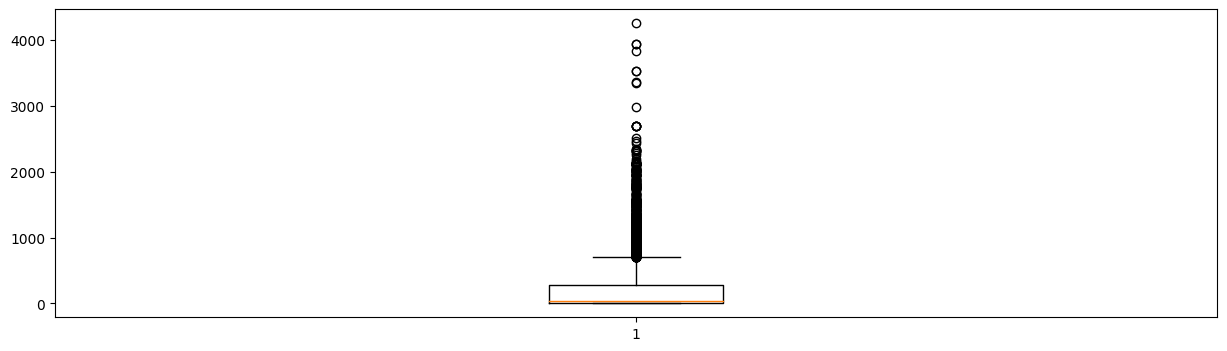

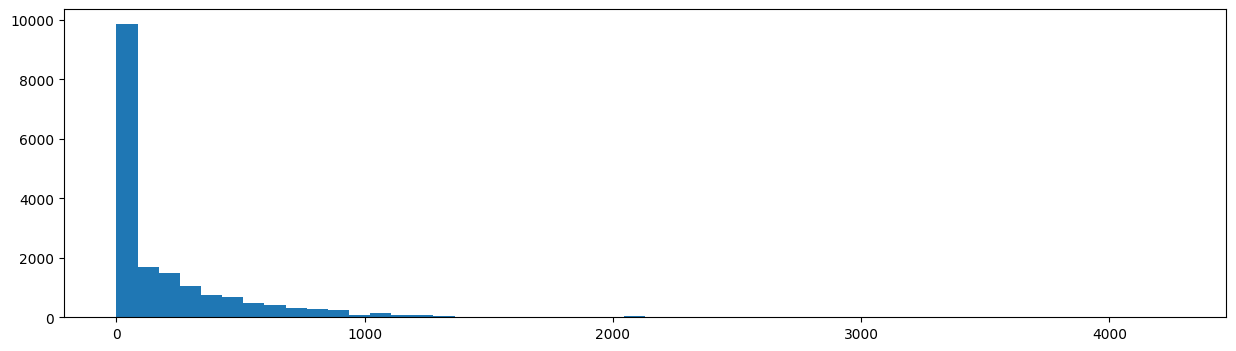

C:\Users\user\AppData\Local\Temp\ipykernel_13520\3889062404.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(benefits1["num_char_benefits"][benefits1['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_13520\3889062404.py:15: FutureWarning: 

`sh

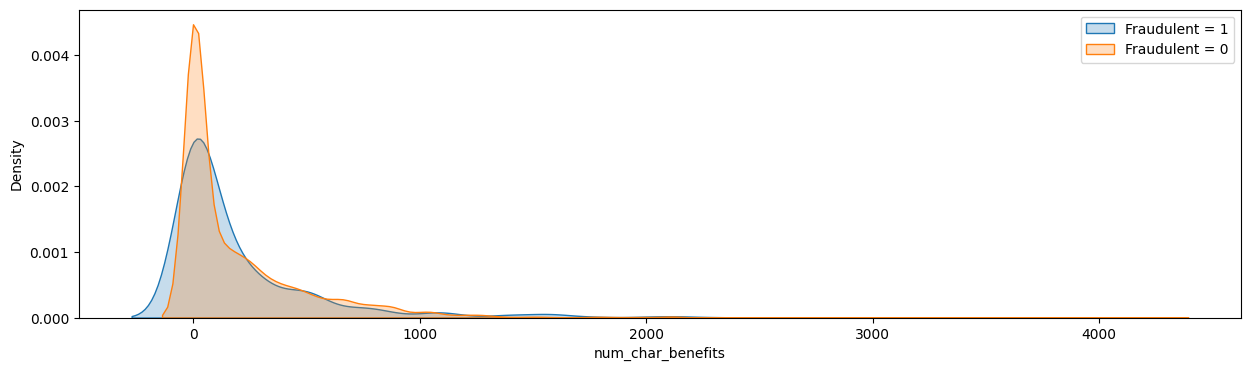

In [34]:
# charts for number of characters
benefits1 = benefits.copy()
#benefits1 = benefits1.loc[benefits1["num_char_benefits"] < 1000]

fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot(benefits1["num_char_benefits"])
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(benefits1["num_char_benefits"], bins = 50)
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(benefits1["num_char_benefits"][benefits1['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(benefits1["num_char_benefits"][benefits1['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

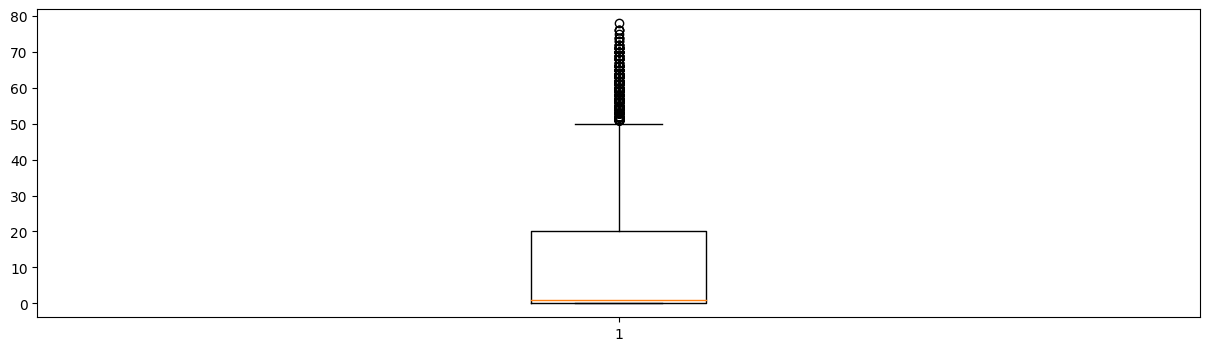

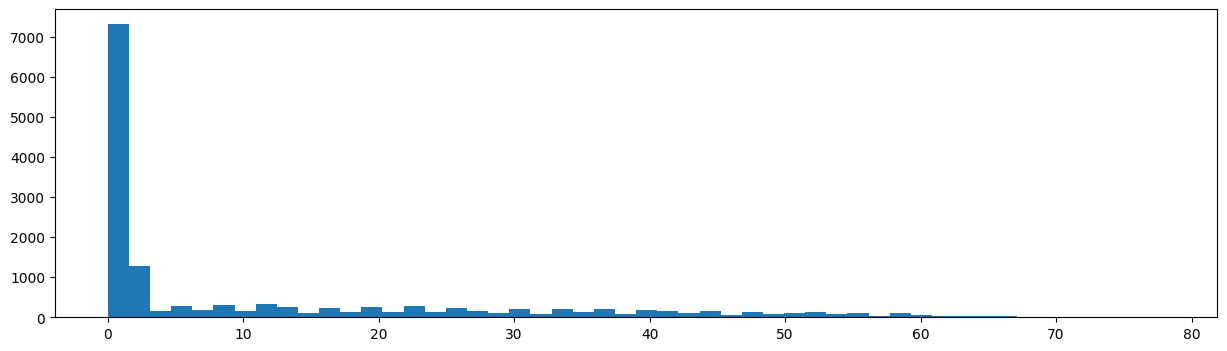

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

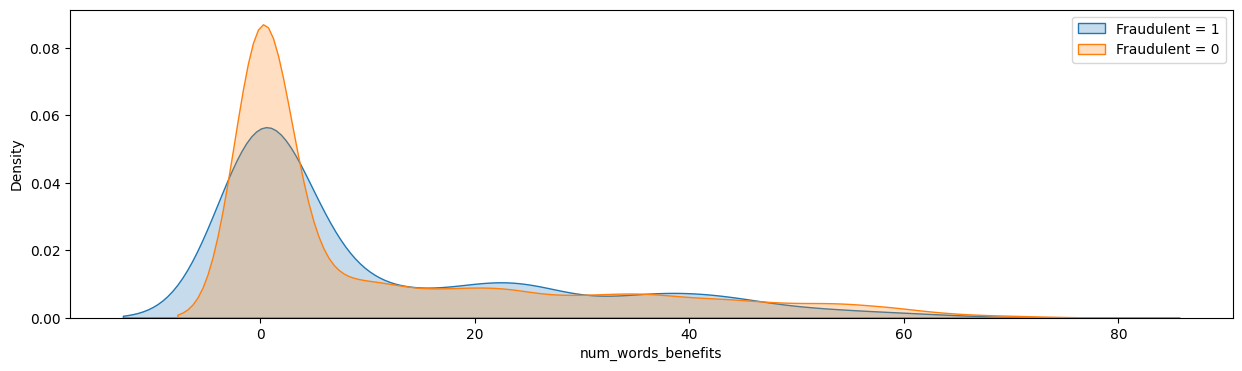

In [39]:
# charts for number of words

benefits2 = benefits.copy()
benefits2 = benefits2.loc[benefits2["num_char_benefits"] < 400]

fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot(benefits2["num_words_benefits"])
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
plt.hist(benefits2["num_words_benefits"], bins = 50)
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(benefits2["num_words_benefits"][benefits2['fraudulent'] == 1], label='Fraudulent = 1', fill=True)
sns.kdeplot(benefits2["num_words_benefits"][benefits2['fraudulent'] == 0], label='Fraudulent = 0', fill=True)
plt.legend()

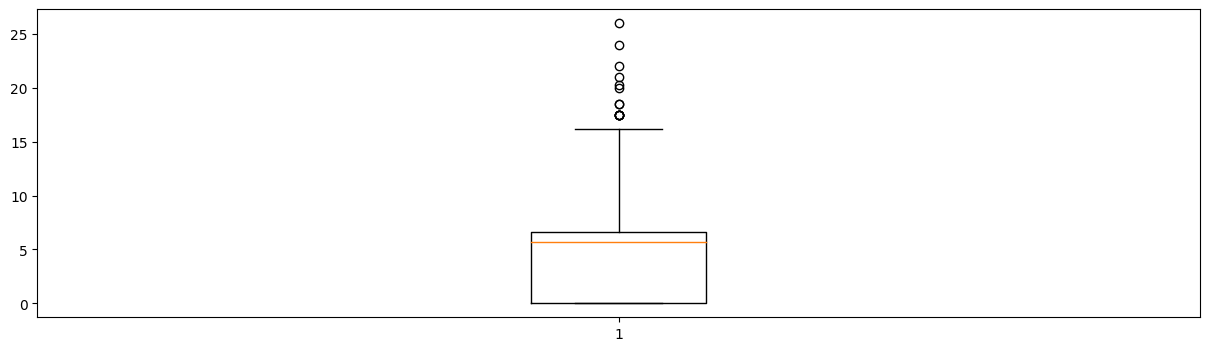

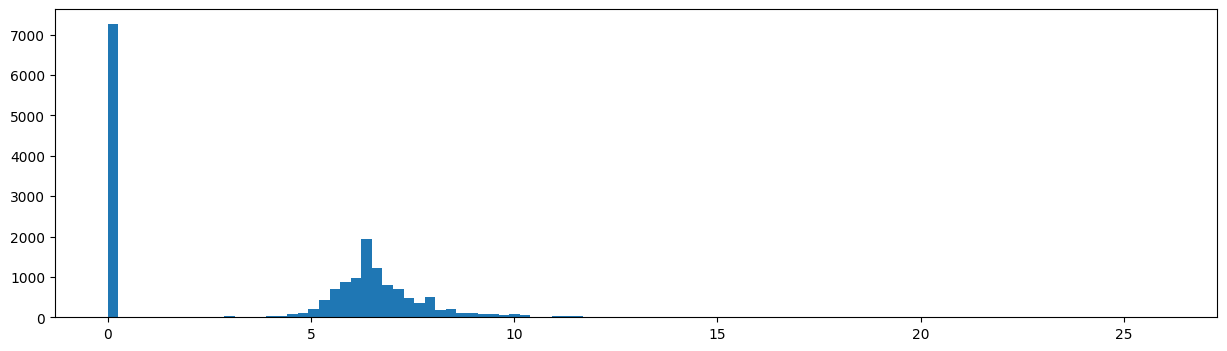

C:\Users\user\AppData\Local\Temp\ipykernel_13520\3354365334.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(benefits3["avg_word_length_benefits"][benefits3['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_13520\3354365334.py:20: FutureWarning

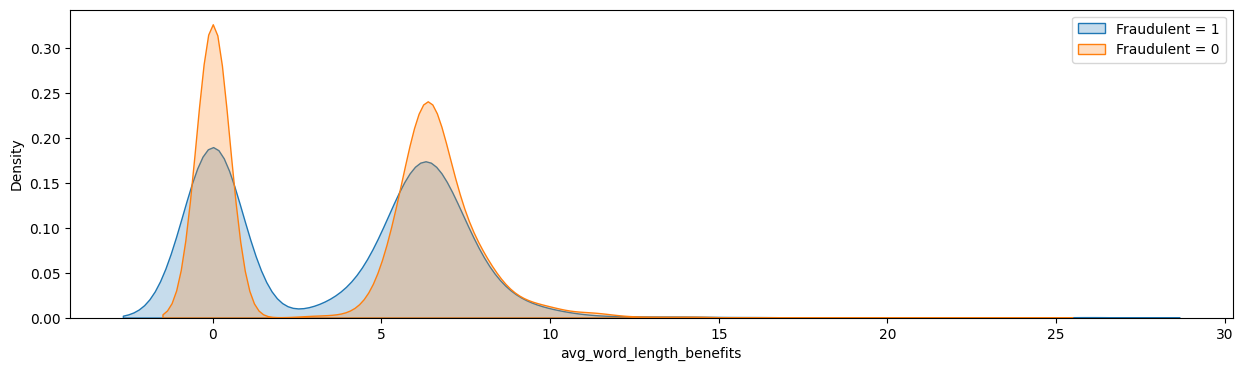

In [44]:
# charts for avg length of words

benefits3 = benefits.copy()

# print(benefits3.loc[benefits3["avg_word_length_benefits"] > 15])
# benefits3 = benefits3.loc[benefits3["avg_word_length_benefits"] < 15]

fig, ax = plt.subplots(figsize=(15,4))
plt.boxplot(benefits3["avg_word_length_benefits"])
plt.show()


# benefits3.info()
fig, ax = plt.subplots(figsize=(15,4))
plt.hist(benefits3["avg_word_length_benefits"], bins = 100)
plt.show()

fig, ax = plt.subplots(figsize=(15,4))
sns.kdeplot(benefits3["avg_word_length_benefits"][benefits3['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
sns.kdeplot(benefits3["avg_word_length_benefits"][benefits3['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
plt.legend()

Actually, I think from the density plots, we can see that around the 6-7 length mark, the ratio for density of fraud to non-fruad is larger than the ratio at the 0 length mark. 

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
benefits4 = benefits.copy()
X = vectorizer.fit_transform(benefits.loc[benefits["fraudulent"] == 1, 'benefits_with_na'])
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
total_word_counts = bow_df.sum(axis=0)


print(total_word_counts.sort_values(ascending = False)[total_word_counts.sort_values(ascending = False) < 185].head(20))

Y = vectorizer.fit_transform(benefits.loc[benefits["fraudulent"] == 0, 'benefits_with_na'])
bow_df1 = pd.DataFrame(Y.toarray(), columns=vectorizer.get_feature_names_out())
total_word_counts1 = bow_df1.sum(axis=0)
print(total_word_counts1.sort_values(ascending = False)[total_word_counts1.sort_values(ascending = False) < 3000].head(20))

# BoW analysis doesnt tell me much

time           161
paid           149
be             147
training       145
environment    139
competitive    130
full           129
life           126
get            123
opportunity    119
offer          119
working        119
employee       117
can            116
it             115
start          108
email          108
salary         100
world           99
skills          99
dtype: int64
competitive    2913
team           2644
that           2525
be             2521
salary         2408
time           2335
paid           2249
at             2199
have           2037
amp            2015
all            1980
from           1957
dental         1905
offer          1852
full           1840
insurance      1790
or             1767
opportunity    1722
this           1697
working        1673
dtype: int64


In [58]:
# Trigrams for fraudulent cases

trigram_vectorizer = CountVectorizer(ngram_range=(2,3))
benefits5 = benefits.copy()
x = trigram_vectorizer.fit_transform(benefits5.loc[benefits5["fraudulent"] == 1, 'benefits_with_na'])
x_df = pd.DataFrame(x.toarray(), columns=trigram_vectorizer.get_feature_names_out())
total_trigram_count_x = x_df.sum(axis=0)


print(total_trigram_count_x.sort_values(ascending = False).head(20))
# print(x_df.head())

we offer             114
get started           93
we are                89
you can               86
benefits and          73
this is               73
work life             68
benefits package      66
time off              64
online training       63
are encouraged to     59
are encouraged        59
encouraged to         59
and we                59
you are               55
an industry           55
in an                 53
work life balance     51
life balance          51
to the                50
dtype: int64
   00 daily  00 daily hospital  00 gbp  00 gbp annually  00 gbp can  \
0         0                  0       0                0           0   
1         0                  0       0                0           0   
2         0                  0       0                0           0   
3         0                  0       0                0           0   
4         0                  0       0                0           0   

   00 gbp monthly  00 gbp only  00 gbp to  00 gbp yearly  00

In [57]:
# Trigrams for non-fraudulent cases

y = trigram_vectorizer.fit_transform(benefits5.loc[benefits5["fraudulent"] == 0, 'benefits_with_na'])
y_df = pd.DataFrame(y.toarray(), columns=trigram_vectorizer.get_feature_names_out())
total_trigram_count_y = y_df.sum(axis=0)


print(total_trigram_count_y.sort_values(ascending = False).head(20))

# interesting, turns out if the thing says see job description that got higher chance for it to be non fraud. Also more emphasis on dental and vision, competitive salary, mention of vacation hour. 

# fraudulent is more on the what you dont need entry level, get started

of the                 1889
in the                 1561
you will               1312
we offer               1244
will be                1169
we are                 1107
competitive salary     1041
to work                 971
part of                 926
opportunity to          925
benefits package        884
full time               838
we have                 797
to the                  777
job description         774
see job                 726
see job description     726
medical dental          713
if you                  704
you can                 665
dtype: int64


In [49]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

benefits6 = benefits.copy()

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

# Function to lemmatize a sentence
def preprocess_sentence(sentence):
    #words = re.findall(r'\b\w+\b', sentence)
    words = word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the entire column
benefits6['lemmatized_benefits'] = benefits6['benefits_with_na'].apply(preprocess_sentence)


0                                                         
1        get usthrough part 90 second team gain experie...
2                                                         
3        culture anything corporate collaborative creat...
4                                     full benefit offered
                               ...                        
17875    expect u open culture openly share result inpu...
17876    health amp wellnessmedical planprescription dr...
17877                                                     
17878    competitive salary compensation based experien...
17879                                                     
Name: lemmatized_benefits, Length: 17880, dtype: object


In [54]:
print(benefits6['lemmatized_benefits'])

TypeError: 'numpy.ndarray' object is not callable

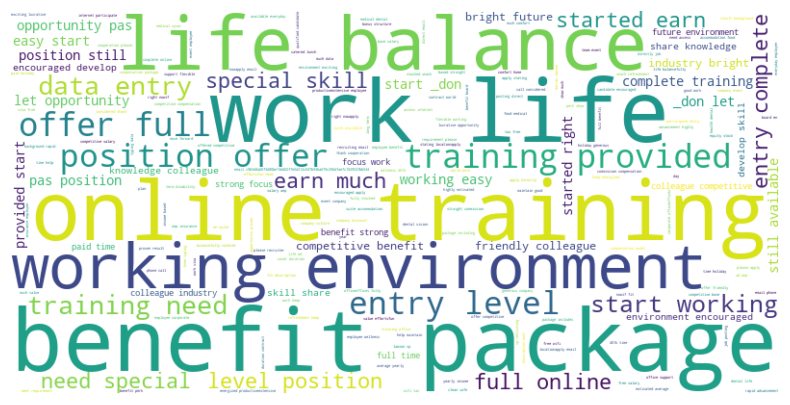

In [52]:
# wordcloud for frauds
all_lemmatized_benefits_fraud = ' '.join(benefits6.loc[benefits6["fraudulent"] == 1, 'lemmatized_benefits'])

# Generate word cloud
wordcloud_fraud = WordCloud(width=800, height=400, background_color='white').generate(all_lemmatized_benefits_fraud)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fraud, interpolation='bilinear')
plt.axis("off")
plt.show()

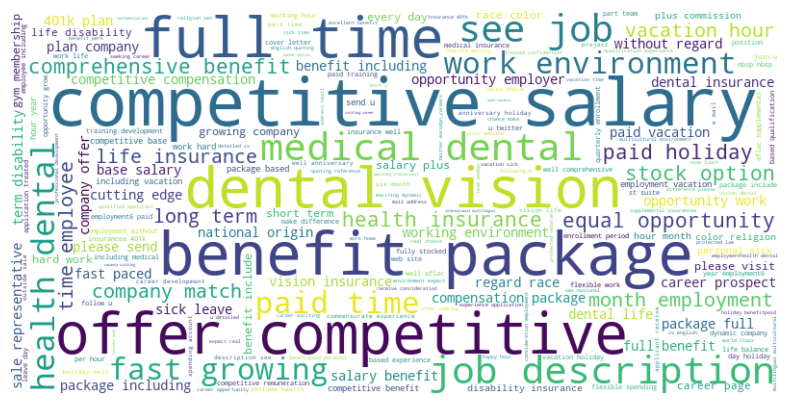

In [55]:
# wordcloud for non-frauds
all_lemmatized_benefits_non_fraud = ' '.join(benefits6.loc[benefits6["fraudulent"] == 0, 'lemmatized_benefits'])

# Generate word cloud
wordcloud_non_fraud = WordCloud(width=800, height=400, background_color='white').generate(all_lemmatized_benefits_non_fraud)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_fraud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
import pandas as pd
# from transformers import DistilBertTokenizer, DistilBertModel
import torch
from transformers import RobertaModel, RobertaTokenizer

model_name = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)




Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
# This takes super long to run boisssss

benefits7 = benefits.copy()
def get_roberta_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

benefits7['roberta_embeddings'] = benefits7['benefits_with_na'].apply(get_roberta_embeddings)

In [71]:
def load_glove_model(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
    return words, word_to_vec_map

glove_file = 'C:/Users/user/OneDrive/Desktop/glove.6B/glove.6B.300d.txt'

words, word_to_vec_map = load_glove_model(glove_file)

# Function to get the average word vector for a sentence
def avg_word_vector(sentence, word_to_vec_map):
    words = sentence.lower().split()
    avg_vec = np.zeros((len(word_to_vec_map['a']),))
    total_words = 0
    for w in words:
        if w in word_to_vec_map:
            avg_vec += word_to_vec_map[w]
            total_words += 1
    if total_words > 0:
        avg_vec /= total_words
    return avg_vec

# Apply GloVe embeddings to the DataFrame
benefits7['glove_embedding'] = benefits7['benefits_with_na'].apply(lambda x: avg_word_vector(x, word_to_vec_map))

In [72]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
def pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return pos_tags

benefits7['pos_tags'] = benefits7['benefits_with_na'].apply(pos_tagging)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [ ]:
# # Lol gg dk why this doesnt work anymore

# def readability_flesch(text):
#     try:
#         readability_scores = Textatistic(text).scores
#         return readability_scores['flesch_score']
#     except ZeroDivisionError:
#         return 100
#     except ValueError:
#         return 0

# benefits4 = benefits.copy()

# benefits["flesch"] = benefits["benefits_with_na"].apply(readability_flesch)

In [ ]:
# # Lol gg dk why this doesnt work anymore

# def readability_gunningfog(text):
#     try:
#         readability_scores = Textatistic(text).scores
#         return readability_scores['gunningfog_score']
#     except ZeroDivisionError:
#         return 0
#     except ValueError:
#         return 0
    

# benefits["gunningfog"] = benefits["benefits_with_na"].apply(readability_gunningfog)

In [ ]:
# # Lol gg dk why this doesnt work anymore
# # charts for flesch scores --> higher the easier to read
# benefits.loc[benefits["flesch"] < 0, "flesch"] = 0
# benefits5 = benefits.copy()
# #benefits3 = benefits3.loc[benefits3["avg_word_length_benefits"] < 400]

# fig, ax = plt.subplots(figsize=(15,4))
# plt.boxplot(benefits5["flesch"])
# plt.show()


# benefits3.info()
# fig, ax = plt.subplots(figsize=(15,4))
# plt.hist(benefits5["flesch"], bins = 100)
# plt.show()

# fig, ax = plt.subplots(figsize=(15,4))
# sns.kdeplot(benefits5["flesch"][benefits5['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
# sns.kdeplot(benefits5["flesch"][benefits5['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
# plt.legend()

# print("Grade 6 to 8.5 seems to have a higher density for fraud")

In [ ]:
# # Lol gg dk why this doesnt work anymore
# # charts for gunningfog scores --> lower the easier to read
# benefits.loc[benefits["gunningfog"] > 20, "gunningfog"] = 20
# benefits6 = benefits.copy()
# #benefits3 = benefits3.loc[benefits3["avg_word_length_benefits"] < 400]

# fig, ax = plt.subplots(figsize=(15,4))
# plt.boxplot(benefits6["gunningfog"])
# plt.show()

# fig, ax = plt.subplots(figsize=(15,4))
# plt.hist(benefits6["gunningfog"], bins = 100)
# plt.show()

# fig, ax = plt.subplots(figsize=(15,4))
# sns.kdeplot(benefits6["gunningfog"][benefits6['fraudulent'] == 1], label='Fraudulent = 1', shade=True)
# sns.kdeplot(benefits6["gunningfog"][benefits6['fraudulent'] == 0], label='Fraudulent = 0', shade=True)
# plt.legend()

# # Grade 1.5 to 12 seems to have a higher density for fraud